###  Autor: Lilian Rebeca Carrera Lemus 
No. Carnet: 20008077  


# Práctica No.4: Back-propagation

* Entrenar un aproximador para la función Xor usando 2 capas intermedias.
    * Usar 2 neuronas en la capa anterior a la salida(segunda capa oculta)
    * Usar al menos 2(pueden ser más) en la  primera capa oculta.
    * Usar activación ReLu en las capas intermedias y  no activación en la salida
* Usar numpy
* Realizar 5 experimentos, en cada experimento(corrida de entrenamiento):
    * Inicializar los parámetros aleatoriamente con distribución normal centrada en 0 y std = 0.1
    * Retornar la representación intermedia de la segunda capa oculta.
*Graficar las 5 representaciones intermedias(1 por experimento), comparar, comentar y/o concluir.

In [1]:
#Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Definir Funciones

In [2]:
#Definir la función de activación
def funcion_relu(x):
    return (x * (x > 0))

In [3]:
#Definir la derivada de la función de activación solicitada
def derivada_relu(x):
    return (x > 0)

In [70]:
#Definimos una clase con las funciones necesarias para definir, inicializar y entrenar la red
class red_neuronal:
    def __init__(self, size_capa1):
        np.random.seed(1)
        #inicializamos la capa
        self.inicializar(size_capa1)
        #Indicar que los pesos aun no han sido entrenados
        self.entrenado = False 
    
    def inicializar(self, size_capa1):
        #definimos capa de dos neuronas
        pesos_p_capa1 = np.random.normal(loc=0, scale=0.1, size=(2, size_capa1))
        #definimos la segunda capa oculta de 2 neuronas
        pesos_p_capa2 = np.random.normal(loc= 0, scale= 0.1, size=(size_capa1, 2)) 
        pesos_p_capaS = np.random.normal(loc= 0, scale= 0.1, size=(2, 1)) 
        self.pesos = [pesos_p_capa1, pesos_p_capa2, pesos_p_capaS]
    
    #Definimoos función para entrenar
    def entrenar(self, ds, etiquetas, lr, epochs):
        if(self.entrenado == True): #Si ya fue entrenado
            #reestablecer pesos
            self.inicializar(self.pesos[0].shape[1]) 
            
        #iteraciones 
        for epoch in range(0, epochs):
            #Realizamos el Forward propagation
            a = ds 
            #para almacenar los resultados intermedios
            capa = [] 
            capa.append(a)

            #Definir ciclo para calcular los valores intermedios de cada capa
            for w in self.pesos:
                #preactivación
                z = np.matmul(a, w) 
                #activación 
                a = funcion_relu(z) 
                capa.append(a)

            #Realizamos Backward propagation
            #Calculo del error
            error = (0.5 * (capa[-1] - etiquetas)**2).mean()

            #Calculo de derivadas parciales
            #Error entre predicción y salida real
            delta_capa3 = capa[-1] - etiquetas 
            #Propagación del error de la última capa hacía las anteriores
            delta_capa2 = np.matmul(delta_capa3, self.pesos[-1].T) * derivada_relu(capa[-2]) 
            delta_capa1 = np.matmul(delta_capa2, self.pesos[-2].T) * derivada_relu(capa[-3]) 

            #actualizamos los pesos de la última capa a la primera
            self.pesos[-1] -= lr * np.matmul(capa[-2].T, delta_capa3) 
            self.pesos[-2] -= lr * np.matmul(capa[-3].T, delta_capa2)
            self.pesos[-3] -= lr * np.matmul(capa[-4].T, delta_capa1)
            
            #Imprimir cálculo del error para cada iteración
            if(epoch % 10 == 4):
                print('No. Iteración ' + str(epoch) + '  Error: ' + str(error))
        
        #Cambiamos el estado para indicar que ya se entrenó la red
        self.entrenado = True
    
    def predecir(self, x):
        #La matriz que se ingresa es de n filas y 2 columnas
        a = x
        capa2 = []
        for i in range(0, len(self.pesos)):
            #preactivación 
            z = np.matmul(a, self.pesos[i]) 
            #activación 
            a = funcion_relu(z) 
            #Si es la segunda capa entonces devolvemos la representación de la segunda capa
            if(i == 1): 
                capa2 = a
                
        return a, capa2

### Experimentos

In [71]:
#Definimos la entrada para xor
x_xor = np.array([[0,0], 
                  [0,1], 
                  [1,0], 
                  [1,1]])

In [72]:
etiquetas_xor = np.array([[0, 1, 1, 0]]).T

**Experimento No.1:**

In [73]:
#Realizamos la definición y entrenamiento del primer experimento con un learning rate de 0.2 y 75 epochs
exp1 = red_neuronal(2)
exp1.entrenar(x_xor, etiquetas_xor, 0.2, 75) 

No. Iteración 4  Error: 0.24983663757863164
No. Iteración 14  Error: 0.24962371514444634
No. Iteración 24  Error: 0.24909193168182236
No. Iteración 34  Error: 0.2472861829998652
No. Iteración 44  Error: 0.23737961399918533
No. Iteración 54  Error: 0.18125854327283397
No. Iteración 64  Error: 0.13246203830808437
No. Iteración 74  Error: 0.1250151247424154


In [74]:
y_aprox, capa_ocul_xor = exp1.predecir(x_xor)
print("La salida del XOR aproximada es: ", np.round(y_aprox).reshape(1,-1))
print("-------------------------------------------------------\n")
print("Los valores de activación de la segunda capa oculta son: \n", capa_ocul_xor)

La salida del XOR aproximada es:  [[0. 0. 1. 0.]]
-------------------------------------------------------

Los valores de activación de la segunda capa oculta son: 
 [[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.89473176 -0.        ]
 [ 0.00487812 -0.        ]]


Text(0.5, 1.0, 'Capa Oculta no.2 XOR')

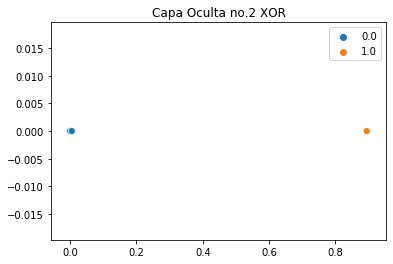

In [75]:
#Graficamos la representación intermedia de la segunda capa oculta
grafica_ri= sns.scatterplot(capa_ocul_xor[:,0], 
                            capa_ocul_xor[:,1], 
                            hue = np.round(y_aprox[:,0]),
                            s = 50)
grafica_ri.set_title("Capa Oculta no.2 XOR")

**Experimento No.2:**

In [76]:
#Realizamos la definición y entrenamiento del segundo experimento con un learning rate de 0.4 y 100 epochs
exp2 = red_neuronal(2)
exp2.entrenar(x_xor, etiquetas_xor, 0.4, 100) 

No. Iteración 4  Error: 0.24977293931286174
No. Iteración 14  Error: 0.24873244877678044
No. Iteración 24  Error: 0.22959181729439718
No. Iteración 34  Error: 0.12739971641786596
No. Iteración 44  Error: 0.12500000001952574
No. Iteración 54  Error: 0.125
No. Iteración 64  Error: 0.125
No. Iteración 74  Error: 0.125
No. Iteración 84  Error: 0.125
No. Iteración 94  Error: 0.125


In [77]:
y_aprox, capa_ocul_xor = exp2.predecir(x_xor)
print("La salida del XOR aproximada es: ", np.round(y_aprox).reshape(1,-1))
print("-------------------------------------------------------\n")
print("Los valores de activación de la segunda capa oculta son: \n", capa_ocul_xor)

La salida del XOR aproximada es:  [[0. 0. 1. 0.]]
-------------------------------------------------------

Los valores de activación de la segunda capa oculta son: 
 [[ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.8996309 -0.       ]
 [ 0.         0.       ]]


Text(0.5, 1.0, 'Capa Oculta no.2 XOR')

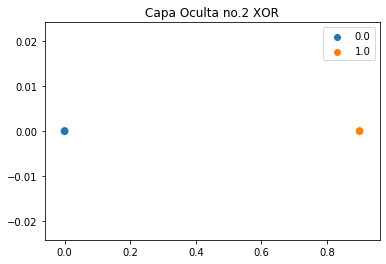

In [78]:
#Graficamos la representación intermedia de la segunda capa oculta
grafica_ri= sns.scatterplot(capa_ocul_xor[:,0], 
                            capa_ocul_xor[:,1], 
                            hue = np.round(y_aprox[:,0]),
                            s = 75)
grafica_ri.set_title("Capa Oculta no.2 XOR")

**Experimento No.3:**

In [79]:
#Realizamos la definición y entrenamiento del tercer experimento con un learning rate de 0.4 y 50 epochs
#Como vemos que el decrecimiento del error se estancó y que las predicciones no son correctas, agregaremos una neurona más a la primera capa oculta
exp3 = red_neuronal(3)
exp3.entrenar(x_xor, etiquetas_xor, 0.4, 50) 

No. Iteración 4  Error: 0.24988105518633186
No. Iteración 14  Error: 0.2478517626459687
No. Iteración 24  Error: 0.19122228205405717
No. Iteración 34  Error: 0.0019975492278509945
No. Iteración 44  Error: 2.389766556986302e-07


In [80]:
y_aprox, capa_ocul_xor = exp3.predecir(x_xor)
print("La salida del XOR aproximada es: ", np.round(y_aprox).reshape(1,-1))
print("-------------------------------------------------------\n")
print("Los valores de activación de la segunda capa oculta son: \n", capa_ocul_xor)

La salida del XOR aproximada es:  [[0. 1. 1. 0.]]
-------------------------------------------------------

Los valores de activación de la segunda capa oculta son: 
 [[ 0.          0.        ]
 [ 0.69720464 -0.        ]
 [ 0.69719665 -0.        ]
 [ 0.          0.        ]]


Text(0.5, 1.0, 'Capa Oculta no.2 XOR')

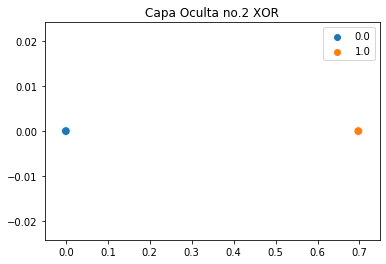

In [81]:
#Graficamos la representación intermedia de la segunda capa oculta
grafica_ri= sns.scatterplot(capa_ocul_xor[:,0], 
                            capa_ocul_xor[:,1], 
                            hue = np.round(y_aprox[:,0]),
                            s = 75)
grafica_ri.set_title("Capa Oculta no.2 XOR")

**Experimento No.4:**

In [82]:
#Realizamos la definición y entrenamiento del tercer experimento con un learning rate de 0.5 y 75 epochs
#Con 3 neuronas, ya que el error disminuyó en el experimento anterior
exp4 = red_neuronal(3)
exp4.entrenar(x_xor, etiquetas_xor, 0.5,75) 

No. Iteración 4  Error: 0.24979207323786093
No. Iteración 14  Error: 0.2449094736398387
No. Iteración 24  Error: 0.04736098739042249
No. Iteración 34  Error: 9.222407497209837e-05
No. Iteración 44  Error: 0.00012943745469205196
No. Iteración 54  Error: 0.00017844860783603985
No. Iteración 64  Error: 0.00023843950628996255
No. Iteración 74  Error: 0.000306094432817652


In [83]:
y_aprox, capa_ocul_xor = exp4.predecir(x_xor)
print("La salida del XOR aproximada es: ", np.round(y_aprox).reshape(1,-1))
print("-------------------------------------------------------\n")
print("Los valores de activación de la segunda capa oculta son: \n", capa_ocul_xor)

La salida del XOR aproximada es:  [[0. 1. 1. 0.]]
-------------------------------------------------------

Los valores de activación de la segunda capa oculta son: 
 [[ 0.          0.        ]
 [ 0.72442694 -0.        ]
 [ 0.72625564 -0.        ]
 [ 0.          0.        ]]


Text(0.5, 1.0, 'Capa Oculta no.2 XOR')

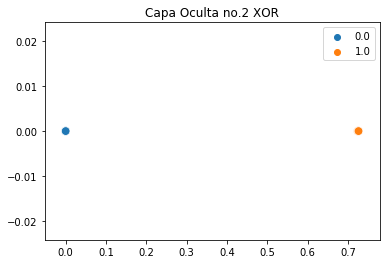

In [84]:
#Graficamos la representación intermedia de la segunda capa oculta
grafica_ri= sns.scatterplot(capa_ocul_xor[:,0], 
                            capa_ocul_xor[:,1], 
                            hue = np.round(y_aprox[:,0]),
                            s = 75)
grafica_ri.set_title("Capa Oculta no.2 XOR")

**Experimento No.5:**

In [85]:
#Realizamos la definición y entrenamiento del tercer experimento con un learning rate de 0.4 y 75 epochs
#Así mismo se agregará una nuerona más en la primera capa oculta
exp5 = red_neuronal(4)
exp5.entrenar(x_xor, etiquetas_xor, 0.4,75) 

No. Iteración 4  Error: 0.25
No. Iteración 14  Error: 0.2499912011137899
No. Iteración 24  Error: 0.24995628601268652
No. Iteración 34  Error: 0.24982945155445077
No. Iteración 44  Error: 0.24711594128356967
No. Iteración 54  Error: 0.16153114663190296
No. Iteración 64  Error: 0.10097699546765682
No. Iteración 74  Error: 0.00019113259836609926


In [86]:
y_aprox, capa_ocul_xor = exp5.predecir(x_xor)
print("La salida del XOR aproximada es: ", np.round(y_aprox).reshape(1,-1))
print("-------------------------------------------------------\n")
print("Los valores de activación de la segunda capa oculta son: \n", capa_ocul_xor)

La salida del XOR aproximada es:  [[0. 1. 1. 0.]]
-------------------------------------------------------

Los valores de activación de la segunda capa oculta son: 
 [[ 0.          0.        ]
 [ 0.70332676 -0.        ]
 [ 0.6995799  -0.        ]
 [ 0.0139132  -0.        ]]


Text(0.5, 1.0, 'Capa Oculta no.2 XOR')

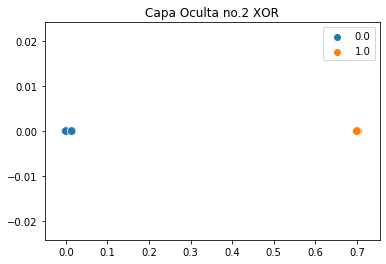

In [87]:
#Graficamos la representación intermedia de la segunda capa oculta
grafica_ri= sns.scatterplot(capa_ocul_xor[:,0], 
                            capa_ocul_xor[:,1], 
                            hue = np.round(y_aprox[:,0]),
                            s = 75)
grafica_ri.set_title("Capa Oculta no.2 XOR")

### Conclusiones

* Como se muestra en las gráficas y en las tablas de la matriz de la segunda capa oculta, en todas las representaciones intermedias de esta segunda capa oculta, solamente una de las neuronas parece tener relevancia e incidencia en el resultado final, ya que la segunda neurona siempre es 0. 

* Así mismo, en las gráficas podemos notar que solamente hay un valor de 0 y 1, y en el último experimento hay 3 valores (2 para 0 y uno para 1), lo cual hace más fácil una separación entre ceros y unos y no como la entrada de etiquetas inicial en donde tenemos 4 valores y no es fácil trazar una línea recta para separar los ceros de los unos.

* En los experimentos se puede observar que es necesario agregar más de dos neuronas a primera capa oculta para poder obtener resultados correctos, asi mismo los mejores valores para el learning rate están entre 0.4-0.5 y la cantidad de epochs entre 50-75.